In [30]:
## import packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten
from keras.layers import Dense, AvgPool2D, MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import RMSprop
# from keras.optimizers import Adam, SGD, RMSProp

import plotly.offline as py
import plotly.express as px
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot

import warnings
warnings.filterwarnings('ignore')

In [10]:
## reading image 

data = 'dataset'

In [11]:
os.listdir(data)

['covid', 'normal']

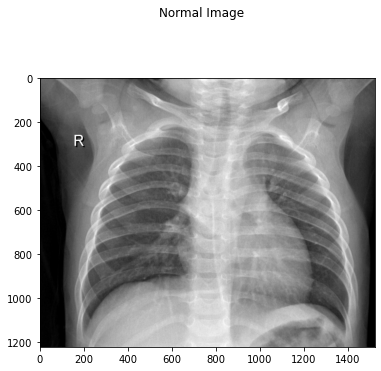

In [14]:
## load normal images

normal_image = []
for img_path in glob.glob(data + '/normal/*'):
    normal_image.append(mpimg.imread(img_path))
    
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Normal Image")
plt.imshow(normal_image[0], cmap='gray')

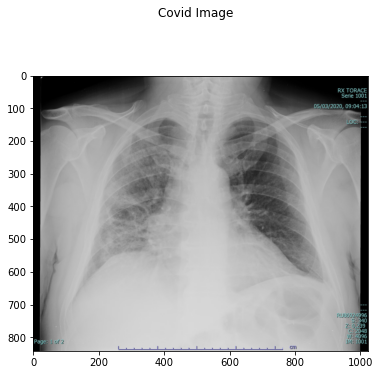

In [13]:
## load Covid image

covid_image = []
for img_path in glob.glob(data + '/covid/*'):
    covid_image.append(mpimg.imread(img_path))
    
fig = plt.figure(figsize=(6, 6))
fig.suptitle('Covid Image')
plt.imshow(covid_image[0], cmap='gray')

In [15]:
## Input Shape, Epochs and Batch Size

Image_Width = 150
Image_Height = 150
Channels = 3
Input_shape = (Image_Width, Image_Height, Channels)
number_of_classes = 2
Epochs = 50
Batch_size = 6

In [17]:
## define Models

# first layer of the network
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=Input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))


model.add(Conv2D(250, (3, 3)))
model.add(Activation('relu'))


model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(AvgPool2D(2, 2))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(AvgPool2D(2, 2))

model.add(Conv2D(256, (2, 2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [19]:
## compile model

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# The model needs to be compiled before training can start. 
# As our loss function, we use logloss which is called "binary_crossentropy" in Keras. 
# Metrics is only used for evaluation. As optimizer, 
# we could have used rmsprop, but Adam is faster.


In [22]:
## Model Summary

model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'model_image.png')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_7 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 70, 70, 250)       144250    
                                                      

In [29]:
## More Training Data generation

train_dataGen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25
                                  )

train_generator = train_dataGen.flow_from_directory(
    data,
    target_size = (Image_Width, Image_Height),
    batch_size = Batch_size,
    class_mode='binary',
    subset='training')

validation_generator = train_dataGen.flow_from_directory(
    data,
    target_size=(Image_Width, Image_Height),
    batch_size = Batch_size,
    class_mode = 'binary',
    shuffle = False,
    subset = 'validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch= train_generator.samples // Batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // Batch_size,
    epochs = Epochs
    
)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


C:\Users\chandru\AppData\Local\Temp/ipykernel_2876/85213308.py:26: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/50
12/12 [==============================] - 13s 892ms/step - loss: 1.4862 - accuracy: 0.5294 - val_loss: 0.7146 - val_accuracy: 0.7083
Epoch 2/50
12/12 [==============================] - 10s 863ms/step - loss: 0.6040 - accuracy: 0.7206 - val_loss: 1.2057 - val_accuracy: 0.2917
Epoch 3/50
12/12 [==============================] - 10s 818ms/step - loss: 0.7114 - accuracy: 0.6618 - val_loss: 0.6204 - val_accuracy: 0.7083
Epoch 4/50
12/12 [==============================] - 10s 837ms/step - loss: 0.6457 - accuracy: 0.6176 - val_loss: 0.7032 - val_accuracy: 0.7083
Epoch 5/50
12/12 [==============================] - 10s 849ms/step - loss: 0.5652 - accuracy: 0.7794 - val_loss: 0.5507 - val_accuracy: 0.8750
Epoch 6/50
12/12 [==============================] - 10s 827ms/step - loss: 0.4200 - accuracy: 0.8824 - val_loss: 0.8153 - val_accuracy: 0.8333
Epoch 7/50
12/12 [==============================] - 10s 844ms/step - loss: 0.6602 - accuracy: 0.7647 - val_loss: 0.5383 - val_accuracy: 0.7083

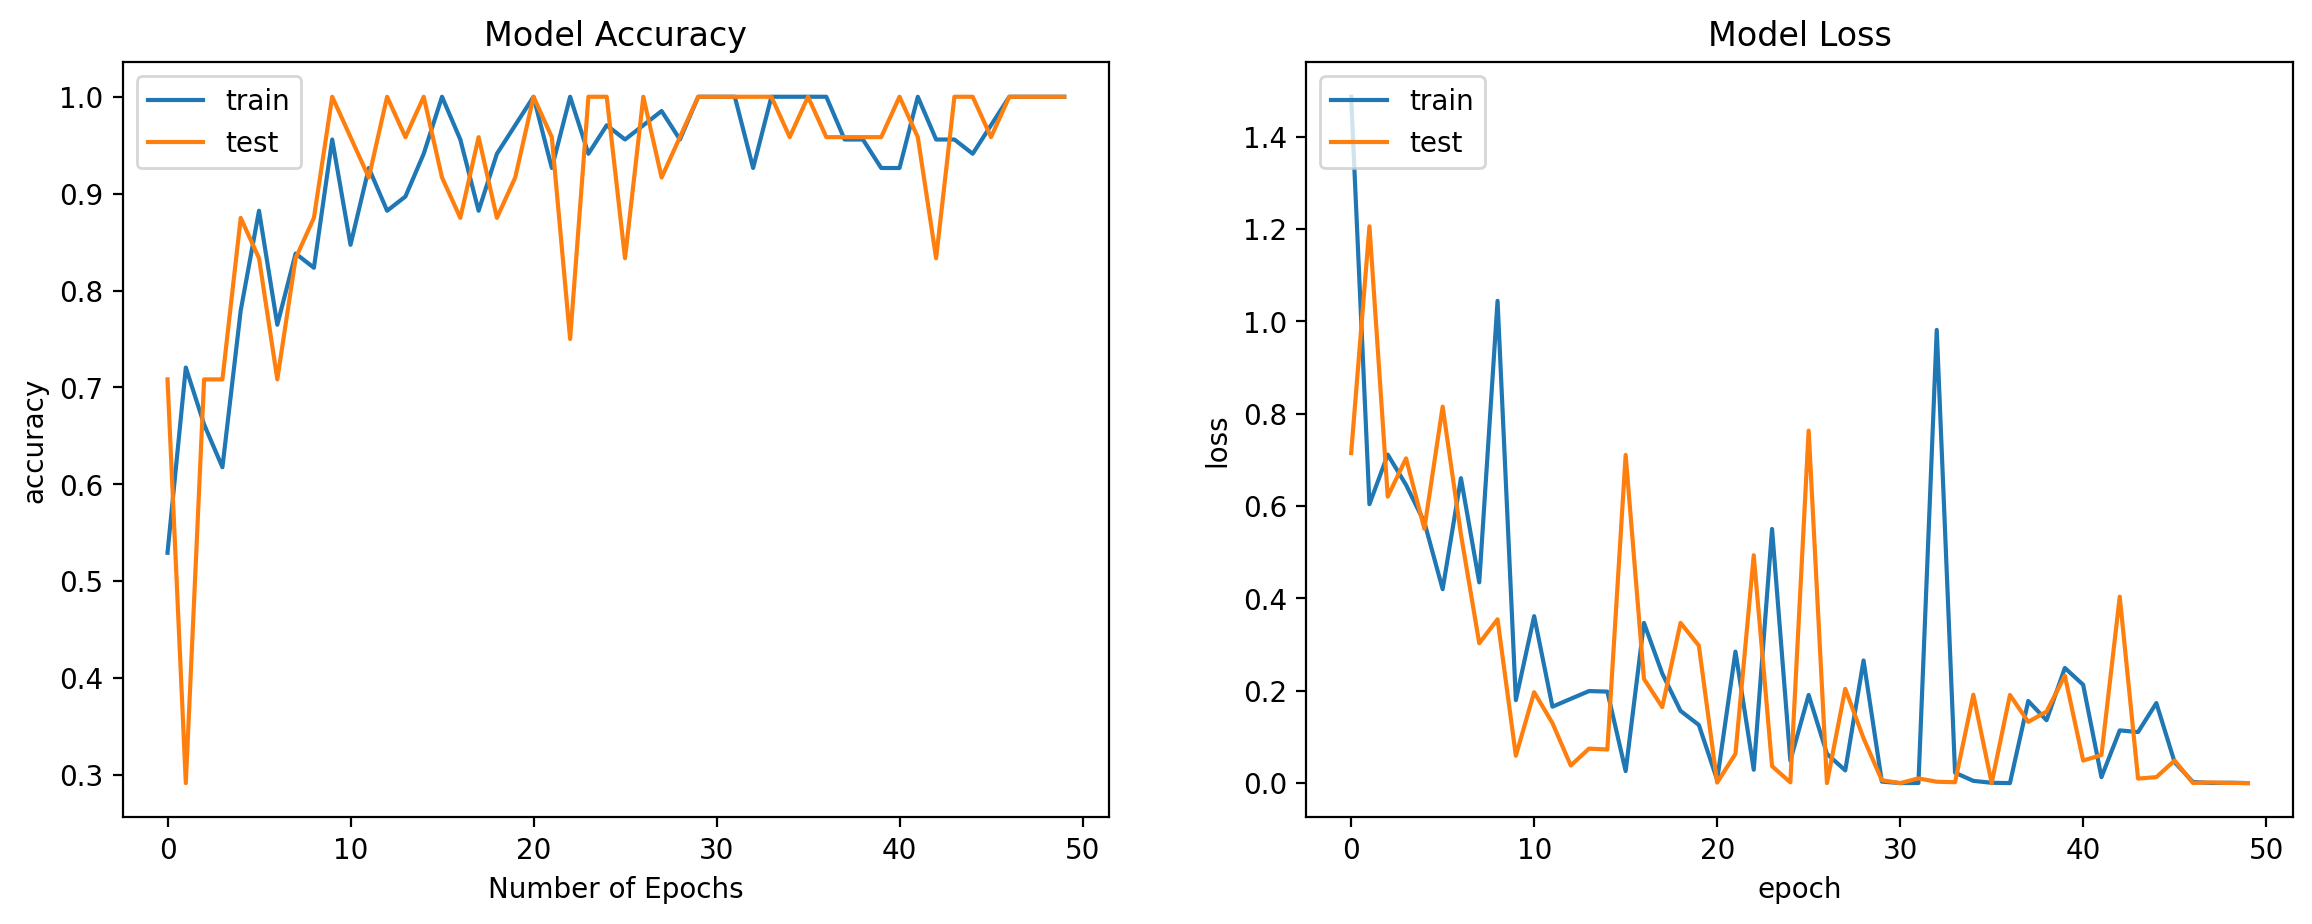

In [34]:
## plot graph

fig, ax = plt.subplots(1, 2, figsize=(14, 5), dpi=200)
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('Number of Epochs')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc = 'upper left')
plt.show()

In [45]:
## Model Over all accuracy

print('************************* ACCURACY ********************')

print('Train accuracy', history.history['accuracy'][-1])
print('Test accuracy', history.history['val_accuracy'][-1])
print('\n')
print('************************** LOSS ***********************')

print('Train Loss', history.history['loss'][-1])
print('Test Loss', history.history['val_loss'][-1])
print('\n')

************************* ACCURACY ********************
Train accuracy 1.0
Test accuracy 1.0


************************** LOSS ***********************
Train Loss 7.740376167930663e-05
Test Loss 0.0001220606136485003




In [52]:
## save and load model for our final usage. 


from keras.models import load_model
model.save("network.h5")
loaded_model = load_model("network.h5")

In [57]:
predictions = (loaded_model.predict(validation_generator)>0.5).astype("int32")

In [ ]:
label = validation_generator.classes

In [98]:
list_ = []

for x in range(len(predictions)):
    val = predictions[x][0]
    list_.append(val)

In [106]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_true = list_,  y_pred = label)

<AxesSubplot:>

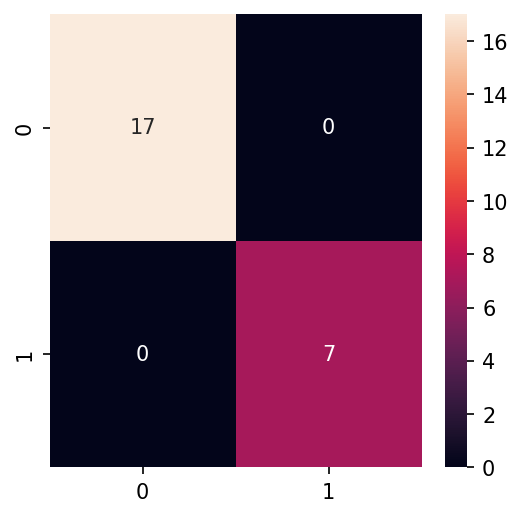

In [111]:
plt.figure(figsize=(4, 4), dpi=150)
import seaborn as sns
sns.heatmap(cf, annot=True)